<a href="https://colab.research.google.com/github/marcelo-magalhaess/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Denver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Marcelo Magalhães</h2>

#### **Estudante de Data Science**
*by [Perfil Linkedin](https://www.linkedin.com/in/marcelo-magalh%C3%A3es-silva-5b388a166/)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

Fundada em agosto de 2008, o [Airbnb](https://www.airbnb.com.br/) é uma empresa que mantém um **marketplace de aluguel de hospedagens**,acessível a todos, ao redor do mundo todo.

O modelo de negócio deles funciona **conectando pessoas** que possuem uma hospedagem para alugar, seja ela um quarto, ou uma casa, **com pessoas** em busca de hospedagem para ficar durante uma viagem.

Em setembro de 2020, a empresa já havia hospedado mais de **800 milhões de pessoas** e gerado um mais de **$110 bilhões em pagamentos** para os donos de hospedagens.

Todos estes valores estão disponíveis no site [Sobre o Airbnb](https://news.airbnb.com/about-us/), além disso, é possível encontrar no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), registro de uma enorme quantidade de dados que podem ser usados em projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Denver, Colorado, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Foto de Denver" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/City_Park_Panorama_2_edited.png/1400px-City_Park_Panorama_2_edited.png"
/></center>

## Obtenção dos Dados


Antes de tudo, é necessário importar as bibliotecas necessárias para manipulação dos dados e apresentação dos mesmos.

In [1]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Agora que todas bibliotecas estão importadas, é necessário importar o arquivo a ser manipulado.

O arquivo está disponível em [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória mais introdutória, iremos usar o arquivo:
* listings.csv - *Summary information and metrics for listings in Denver (good for visualisations).*

In [2]:
# importando o arquivo listings.csv para um DataFrame

data = pd.read_csv("http://data.insideairbnb.com/united-states/co/denver/2020-12-29/visualisations/listings.csv")

## Análise dos Dados

Antes de começarmos qualquer análise, primeiramente iremos ver os primeiros registros do DataSet, para ver quais atributos temos e os tipos.

In [3]:
# mostrando as 5 primeiras entradas

data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,177,Tiny Home in the Heart of the City- ECO FRIENDLY,615,Joe,NaN,Washington Virginia Vale,39.69753,-104.92588,Entire home/apt,89,1,80,2020-12-22,1.54,1,0
1,321,Immaculate,743,Anita,NaN,Windsor,39.69536,-104.87970,Entire home/apt,700,1,0,NaN,NaN,2,365
2,360,Sit in the Peaceful Garden of the Chickadee Co...,666,Jennifer & Giovanni,NaN,Highland,39.76703,-105.00256,Entire home/apt,133,3,132,2020-12-20,4.55,2,67
3,364,Lodo / RiNo LOFT via airport train,783,Jason,NaN,Five Points,39.76551,-104.97902,Entire home/apt,179,185,87,2016-04-26,0.61,1,363
4,590,Comfortable - and a great value!,933,Jill,NaN,North Park Hill,39.75361,-104.91237,Private room,54,1,608,2020-09-01,4.24,2,0


Esta parte da análise tem por objetivo descrever melhor o que é cada dado do DataFrame usado, com a finalidade de facilitar análises futuras.

**Dicionário das variáveis**

* `id`: Indíce gerado para identificação única de cada registro
* `name`: Nome da acomodação anunciada
* `host_id`: Número de identificação do proprietário da hospedagem
* `host_name`: Nome do proprietário da hospedagem cadastrada
* `neighbourhood_group`: Não há nenhum valor válido nessa coluna
* `neighbourhood`: Nome do bairro em que a hospedagem está localizada
* `latitude`: Valor da latitude em que a hospedagem está
* `longitude`: Valor da longitude em que a hospedagem está
* `room_type`: Tipo da hospedagem oferecida
* `price`: Preço da diária do local
* `minimum_nights`: Quantidade mínima de noites necessárias para alugar
* `number_of_reviews`: Número de avaliações que a hospedagem recebeu
* `last_review`: Data da última avaliação recebida
* `reviews_per_month`: Número de avaliações recebidas por mês
* `calculated_host_listings_count`: Número de hospedagens do mesmo anfitrião
* `availability_365`: Número de dias disponiveis dentro de 365



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora é necessário saber a quantidade de linhasXcolunas do nosso *dataset* e os tipos de cada váriavel presente.

In [4]:
# identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(data.shape[0]))
print("Variáveis:\t {}".format(data.shape[1]))


# verificando os tipos das váriaveis do DataSet
display(data.dtypes)

Entradas:	 3502
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Portanto, temos 3502 linhas e 16 colunas neste *dataset*. Existe ainda a versão completa dos mesmos dados, aonde tem-se maior quantidade de colunas.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Os valores ausentes em um *dataset* influenciam totalmente no resultado da análise, portanto, é necessário analisar se estes valores nulos vão influenciar no nosso caso, ou não.


In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.207310
last_review                       0.207310
host_name                         0.000286
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Com o resultado do código acima é possível perceber:
* A coluna `neighbourhood_group` está totalmente vazia
* `reviews_per_month` e `last_review` possuem cerca de 21% dos valores nulos
* As demais váriaveis estão com 100% dos valores completos

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para verificar a distribuição das variáveis é necessário plotar o histograma de cada uma, com a finalidade de ver como os valores estão distribuidos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4990817400>,
      dtype=object)

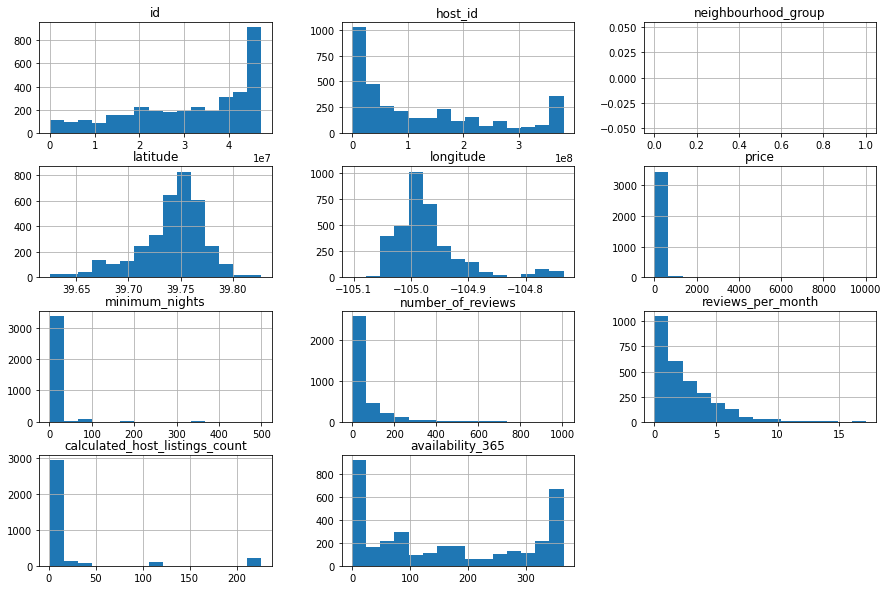

In [6]:
# plotando o histograma das variáveis numéricas
data.hist(bins=15,figsize=(15,10))

### **Q4. Há *outliers* presentes?**

Primeiramente, o significado de *outlier* é um valor que foge da normalidade dos demais valores, sendo assim, pode distorcer os resultados obtidos.

Sendo assim, usaremos o método de resumo estatístico das variáveis, para analisar se há algum *outlier* dentro dos valores e depois usaremos boxplots para ver qual o intervalo de valores.



In [7]:
# ver resumo estatístico dos dados

data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3502.000000,3502.000000,3502.000000,2776.000000,3502.000000,3502.000000
mean,161.385494,13.813535,52.382067,2.382176,21.536265,161.153626
std,307.240866,26.842252,84.782651,2.164636,57.406588,139.451659
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,1.000000,1.000000,0.720000,1.000000,16.000000
50%,110.000000,2.000000,16.000000,1.795000,1.000000,134.000000
75%,170.000000,30.000000,68.000000,3.472500,4.000000,318.000000
max,10000.000000,500.000000,1005.000000,17.140000,226.000000,365.000000


Olhando o resultado do resumo, é possível tirar algumas conclusões sobre os dados:
* Na variável `price`, 75% dos valores estão abaixo de 170 dólares e o valor máximo é de 10,000 dólares;

* Em `minimum_nights` o valor máximo é de 500 dias, coisa que ultrapassa os 365 dias do ano.

####Boxplots para price

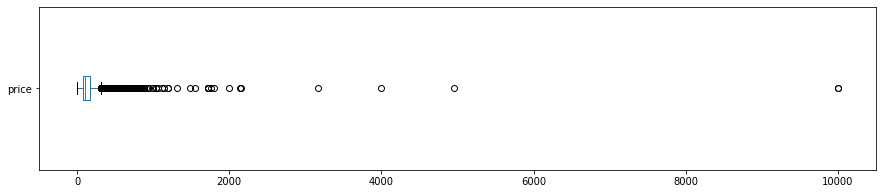


price: valores acima de 1200
18 entradas
0.5140%


In [12]:
data.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

#quantidade de valores acima de 1200
print("\nprice: valores acima de 1200")
print("{} entradas".format(len(data[data.price>1200])))
print("{:.4f}%".format((len(data[data.price > 1200]) / data.shape[0])*100))


####Boxplots para `minimum_nights`


price: valores acima de 180
116 entradas
3.3124%


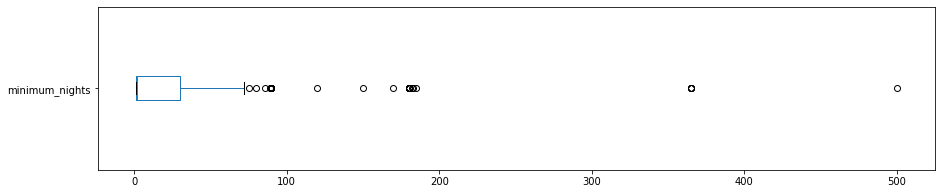

In [24]:
data.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show

#quantidade de valores acima de 80
print("\nprice: valores acima de 80")
print("{} entradas".format(len(data[data.minimum_nights>80])))
print("{:.4f}%".format((len(data[data.minimum_nights > 80]) / data.shape[0])*100))

####Removendo outliers

Agora que foi concluído que há outliers tanto em `price` quanto em minimum_nights, é necessário remover estes valores para que a análise prossiga da forma adequada.

In [25]:
#removendo outliers

data_clean = data.copy()
data_clean.drop(data_clean[data_clean.price>1200].index, axis=0, inplace=True)
data_clean.drop(data_clean[data_clean.minimum_nights>80].index, axis=0, inplace=True)

#remover neighbourhood_group já que está vazio
data_clean.drop('neighbourhood_group',axis=1, inplace=True)


####Histogramas sem outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4987063780>,
      dtype=object)

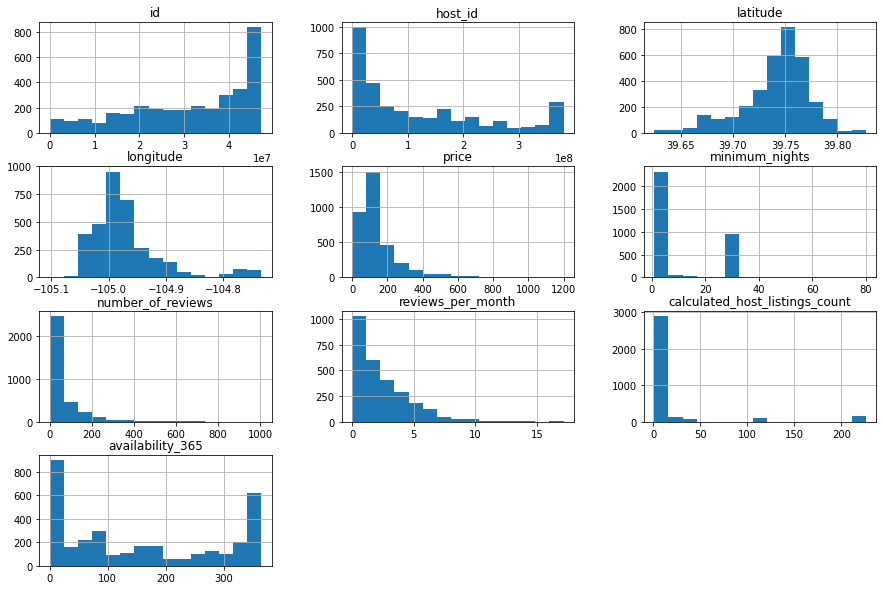

In [26]:
data_clean.hist(bins=15,figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

Agora será calculado a média dos valores de preço dos alugueis após a retirada dos valores discrepantes.

In [29]:
print("Média dos valores da coluna price: ${:.2f}".format(data_clean.price.mean()))

Média dos valores da coluna price: $146.91


### **Q4. Qual a correlação existente entre as variáveis**

Quando há correlação entre variáveis, isso quer dizer que existe uma relação entre as mesma, ou seja, uma semelhança.

Existem duas formas de medir-se esta relação:

* Criando uma matriz de correlação;
* Plotando um heatmap, ou seja, um mapa de calor.


In [31]:
# criando uma matriz de correlação
correlation = data_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(correlation)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.085939,-0.120550,-0.161823,0.056743,0.098934
minimum_nights,-0.085939,1.000000,-0.214833,-0.343061,0.276486,0.135005
number_of_reviews,-0.120550,-0.214833,1.000000,0.686109,-0.192131,-0.078751
reviews_per_month,-0.161823,-0.343061,0.686109,1.000000,-0.129554,-0.068682
calculated_host_listings_count,0.056743,0.276486,-0.192131,-0.129554,1.000000,0.315550
availability_365,0.098934,0.135005,-0.078751,-0.068682,0.315550,1.000000


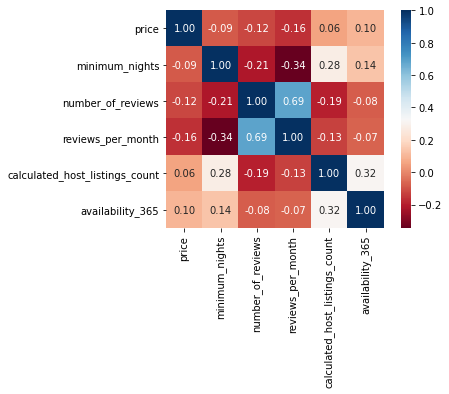

In [32]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlation, cmap='RdBu', fmt='.2f', square= True, linecolor='white',annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Dentro do airbnb são ofertados muitos tipos de imóveis para alugar, podendo ser desde apartamentos, até grandes mansões. Agora veremos os tipos presentes e quantidades.

In [33]:
# mostrar a quantidade de cada tipo de imóvel disponível
data_clean.room_type.value_counts()

Entire home/apt    2582
Private room        726
Hotel room           31
Shared room          29
Name: room_type, dtype: int64

In [34]:
# mostrar a porcentagem de cada tipo de imóvel disponível
data_clean.room_type.value_counts() / data_clean.shape[0]

Entire home/apt    0.766627
Private room       0.215558
Hotel room         0.009204
Shared room        0.008610
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [37]:
# ver preços por bairros, na média
data_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
DIA               215.545455
Civic Center      206.700000
Jefferson Park    198.301887
Bear Valley       196.000000
Cherry Creek      195.147059
Union Station     193.793893
Windsor           191.800000
Country Club      182.666667
Belcaro           181.000000
West Colfax       180.141414
Name: price, dtype: float64

Acima podemos verificar que o maior valor de média é 215,5 dólares por dia, agora veremos a quantidade de imóveis no bairro DIA e ver se este valor de média condiz com a quantidade de imóveis.

In [40]:
#Mostrando quantidade de imóveis no bairro com maior média

print("Número de imóveis: {}".format(data_clean[data_clean.neighbourhood=='DIA'].shape))

Número de imóveis: (33, 15)


Portanto, temos um total de 33 imóveis neste bairro.

####Plotando imóveis por longitude e latitude

Como os registros possuem informações de sua longitude e latitude, é possível plota-las em um gráfico, o que vai gerar algo muito semelhante a um mapa.

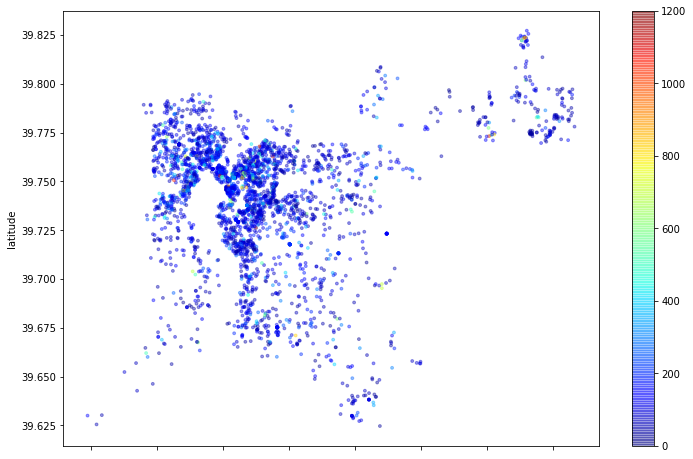

In [41]:
# plotar os imóveis pela latitude-longitude
data_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=data_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [45]:
# ver a média da coluna `minimum_nights``
print("Quantidade média de noites mínimas a se contratar são: {:.4f} noites.".format(data_clean.minimum_nights.mean()))

Quantidade média de noites mínimas a se contratar são: 10.1921 noites.


## Conclusões


Neste notebook foi feita apenas uma análise superficial com o dataset mais básico disponibilizado pela airbnb.

Apesar de existir alguns *outliers* dentro dos valores, é possível tirar algumas conclusões:

* O bairro com média de valor mais cara é o DIA e possui um valor de $215,55;
* Pelo histograma é possível perceber uma grande quantidade de imóveis em uma mesma região, o que pode ser confirmado com a plotagem do gráfico;
* O tipo de imóvel com maior quantidade são as casas/apartamentos, com um total de 2582 imóveis para aluguel.

Por fim, para uma análise mais rica em detalhes é necessário a versão completa do dataset, que possuí um total de 106 colunas. Portanto, esta análise foi bem introdutória, apenas para ter noção dos dados.
